In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

execfile ("_ImportScript.py")

1


In [2]:
# Make a Universe with large n_max
beatbox.You.initiate_simulated_universe( truncated_nmax=15, truncated_nmin=None, truncated_lmax=60, truncated_lmin=None, n_s=0.97,kstar=0.02,PSnorm=2.43e-9,Pdist=1,Pmax=2*np.pi,Pvar=0.0, fngrid=None, printout=1)

Generated  14146  potential Fourier coefficients
 with phases uniformly distributed between 0 and  6.28318530718
Built potential grid, with dimensions  (41, 41, 41)  and mean value  0.0 +/- 1.2819413


/Users/LaurencePeanuts/Documents/Travail/Stanford/Music/Music/beatbox/universe.py:580: RuntimeWarning: divide by zero encountered in power
  self.Power_Spectrum = self.PSnorm*10000*np.power((self.k/self.kstar) ,(-3+(self.n_s-1)))


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


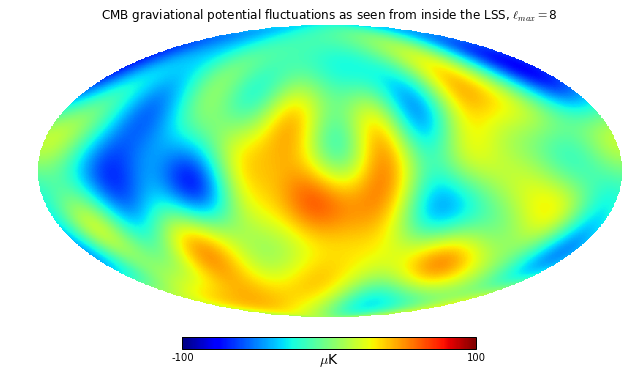

In [4]:
beatbox.You.all_simulated_universes[0].show_CMB_T_map()

In [2]:
beatbox.You.initiate_simulated_universe( truncated_nmax=None, truncated_nmin=None, truncated_lmax=None, truncated_lmin=None, n_s=0.97,kstar=0.02,PSnorm=2.43e-9,Pdist=1,Pmax=2*np.pi,Pvar=0.0, fngrid=None, printout=1)

Generated  2108  potential Fourier coefficients
 with phases uniformly distributed between 0 and  6.28318530718
Built potential grid, with dimensions  (41, 41, 41)  and mean value  0.0 +/- 1.1626672


/Users/LaurencePeanuts/Documents/Travail/Stanford/Music/Music/beatbox/universe.py:580: RuntimeWarning: divide by zero encountered in power
  self.Power_Spectrum = self.PSnorm*10000*np.power((self.k/self.kstar) ,(-3+(self.n_s-1)))


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


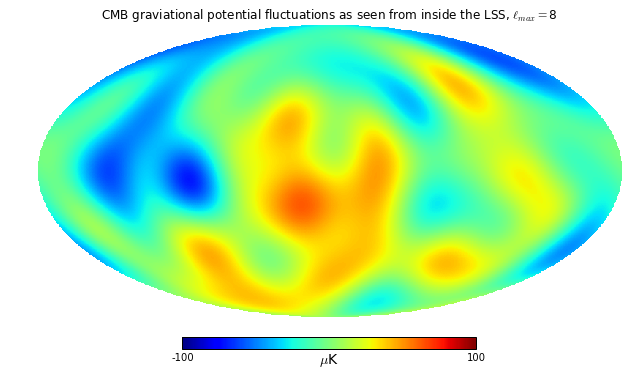

In [3]:
beatbox.You.all_simulated_universes[0].show_CMB_T_map()

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


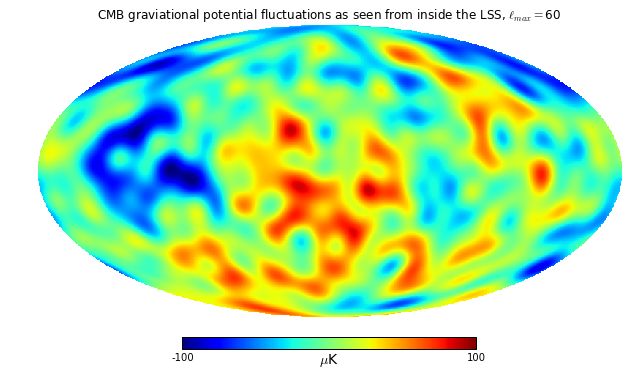

In [3]:
beatbox.You.all_simulated_universes[0].show_CMB_T_map()

In [4]:
# Calculate C_yy from the 100 posterior sample Commander Planck CMB temperature maps 
#    or load the C_yy matrix if already calculated
if not os.path.isfile('../data/covCyy_lmax%d_lmin%d.txt' % (beatbox.Multiverse.truncated_lmax, beatbox.Multiverse.truncated_lmin)):
    beatbox.You.read_Planck_samples()
    beatbox.You.calculate_covariance_matrix(filename='lmax%d_lmin%d' % (beatbox.Multiverse.truncated_lmax, beatbox.Multiverse.truncated_lmin))
else:
    beatbox.You.load_covariance_matrix(filename='covCyy_lmax%d_lmin%d.txt' % (beatbox.Multiverse.truncated_lmax, beatbox.Multiverse.truncated_lmin))
    
# Calculate the inverse of the a_y covariance matrix
beatbox.You.calculate_sdv_Cyy_inverse()

In [13]:
numreal = 1000
MockUniverse = np.array([])
MockUniverse = np.append(MockUniverse, [beatbox.Universe() for i in range(numreal)])
beatbox.You.all_simulated_universes[0].lms = [(l, m) for l in range(beatbox.You.all_simulated_universes[0].truncated_lmin,beatbox.You.all_simulated_universes[0].truncated_lmax+1) for m in range(-l, l+1)]
MockUniverse[0].truncated_lmax = 60
MockUniverse[0].truncated_nmax = 15
MockUniverse[0].set_instance_k_filter(truncated_nmax=None,truncated_nmin=None)
MockUniverse[0].populate_instance_response_matrix(truncated_nmax=None, truncated_nmin=None,truncated_lmax=None, truncated_lmin=None, usedefault=1)
for i in range(numreal):
    MockUniverse[i].truncated_lmax = MockUniverse[0].truncated_lmax
    MockUniverse[i].truncated_nmax=MockUniverse[0].truncated_nmax
    MockUniverse[i].R = MockUniverse[0].R 
    MockUniverse[i].kfilter = MockUniverse[0].kfilter
    MockUniverse[i].lms = beatbox.You.all_simulated_universes[0].lms 

In [14]:
Noise = np.zeros(len(beatbox.You.all_simulated_universes[0].ay))
ay_real = beatbox.You.all_simulated_universes[0].ay2ayreal_for_inference(beatbox.You.all_simulated_universes[0].ay)
beatbox.You.all_simulated_universes[0].ay_real = ay_real
for n in range(numreal):
    Noise[:beatbox.You.C_yy.shape[0]] = beatbox.You.generate_one_realization_of_noise()
    MockUniverse[n].ay_real = beatbox.You.all_simulated_universes[0].ay_real + Noise
    MockUniverse[n].ayreal2ay_for_mapping(MockUniverse[n].ay_real)
    MockUniverse[n].ay2alm(MockUniverse[n].ay, truncated_lmax=MockUniverse[n].truncated_lmax, truncated_lmin=MockUniverse[n].truncated_lmin, usedefault=0)
    MockUniverse[n].Tmap = hp.alm2map(MockUniverse[n].alm, 256)
    this_file='RobustnessAnalysis/MockUniverse_nmax15_lmax60_noiseupto8/MockUniverse_'+str(n)
    MockUniverse[n].write_CMB_T_map(from_this=MockUniverse[n].Tmap, to_this=this_file)


        Use :meth:`BinTableHDU.from_columns` for new BINARY tables or :meth:`TableHDU.from_columns` for new ASCII tables instead. [astropy.utils.decorators]
        Use :meth:`BinTableHDU.from_columns` for new BINARY tables or :meth:`TableHDU.from_columns` for new ASCII tables instead.


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm

In [48]:
MockUniverse[0].ay2alm(MockUniverse[0].ay, truncated_lmax=MockUniverse[n].truncated_lmax, truncated_lmin=MockUniverse[0].truncated_lmin, usedefault=0)



a_y and (l, m) are of unequal lenghts, cannot proceed


In [62]:
print MockUniverse[n].truncated_lmax, MockUniverse[0].truncated_lmin
print len(lms), MockUniverse[n].ay.shape, len(beatbox.You.all_simulated_universes[0].lms)

15 1
255 (3720,) 80


In [54]:
lms = [(l, m) for l in range(MockUniverse[0].truncated_lmin,MockUniverse[0].truncated_lmax+1) for m in range(-l, l+1)]

In [12]:
print len(beatbox.You.all_simulated_universes[0].ay )

3720


In [19]:
print np.min(beatbox.You.all_simulated_universes[0].fn)

-18.019317656
